In [21]:
from src.d00_utils import definitions as defs
from src.d04_analysis import distortion_performance as dp
from src.d04_analysis.plot import plot_results_together
import src.d04_analysis.analysis_functions
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [22]:
from pathlib import Path

In [ ]:
# # initialize ModelDistortionPerformanceResult instances for each of the model results to be considered
#
# endpoint_artifact_id = "0018_rlt_0030_mdl_rst4_b5_nf5_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
# endpoint_identifier = 'endpoint'
# endpoint, __ = dp.get_model_distortion_performance_result(endpoint_artifact_id, endpoint_identifier)
#
# full_range_artifact_id = "0017_rlt_0027_mdl_rst1_b10_nf11_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
# full_range_identifier = 'full-range'
# full_range, __ = dp.get_model_distortion_performance_result(full_range_artifact_id, full_range_identifier)
#
# mid_band_artifact_id = "0016_rlt_0028_mdl_rst2_b11_nf10_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
# mid_band_identifier = 'mid-band'
# mid_band, __ = dp.get_model_distortion_performance_result(mid_band_artifact_id, mid_band_identifier)
#
# midpoint_artifact_id = "0015_rlt_0029_mdl_rst3_b4_nf4_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
# midpoint_identifier = 'midpoint'
# midpoint, __ = dp.get_model_distortion_performance_result(midpoint_artifact_id, midpoint_identifier)
#
# pre_trained_artifact_id = "0014_rlt_0001_0040_tst_rs1_bcs3_nfs3_noise"
# pre_trained_identifier = 'pre-trained'
# pre_trained, __ = dp.get_model_distortion_performance_result(pre_trained_artifact_id, pre_trained_identifier)

In [ ]:
# default_lr_artifact_id = "0012-rlt-0001-mdl-resnet50_sat6_best_loss-0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise"  # sat6
# default_lr_identifier = 'RN50-pre-trained'
# default_lr, __ = dp.get_model_distortion_performance_result(default_lr_artifact_id, default_lr_identifier)
#
# low_lr_early_stop_artifact_id = '0013-rlt-0003-resnet50_sat6-pretrain_lower_lr-0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise'  # sat6
# low_lr_early_stop_identifier =  'RN50-pt-low-lr-early-stop'
# low_lr_early_stop, __ = dp.get_model_distortion_performance_result(low_lr_early_stop_artifact_id , low_lr_early_stop_identifier)
#
# low_lr_artifact_id = '0014-rlt-0004-resnet50_sat6-pretrain_lower_lr_best_loss-0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise'  # sat6
# low_lr_identifier = 'RN50-pt-low-lr'
# low_lr, __ = dp.get_model_distortion_performance_result(low_lr_artifact_id , low_lr_identifier)

In [ ]:
# pre_trained_rn50_artifact_id = '0013-rlt-0003-resnet50_sat6-pretrain_lower_lr-0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise'  # sat6
# pre_trained_rn50_identifier =  'RN50-pre-trained'
# rn50_pre_trained, __ = dp.get_model_distortion_performance_result(pre_trained_rn50_artifact_id , pre_trained_rn50_identifier)
#
# full_range_rn50_artifact_id = '0015-rlt-0005-resnet50_sat6-full_range_best_loss-0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise'  # sat6
# full_range_rn50_identifier= 'RN50-full-range'
# rn50_full_range, __ = dp.get_model_distortion_performance_result(full_range_rn50_artifact_id, full_range_rn50_identifier)
#
# full_range_rn50_copy_artifact_id = '0015-rlt-0005-resnet50_sat6-full_range_best_loss-0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise'  # sat6
# full_range_rn50_copy_identifier= 'RN50-full-range_copy'
# rn50_full_range_copy, __ = dp.get_model_distortion_performance_result(full_range_rn50_copy_artifact_id, full_range_rn50_copy_identifier)


In [29]:
rn18_megaset_2_id= '0023-rlt-0008-resnet18_sat6-full_range_best_loss-0009-tst-full_range_mega_set_2_noise:v0'  # sat6
rn18_megaset_2_identifier =  'RN18-megaset-2'
rn18_megaset_2, __ = dp.get_model_distortion_performance_result(rn18_megaset_2_id, rn18_megaset_2_identifier)


In [35]:
rn18_megaset_1_id= '0019-rlt-0008-resnet18_sat6-full_range_best_loss-0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise:v0'  # sat6
rn18_megaset_1_identifier =  'RN18-megaset-1'
rn18_megaset_1, __ = dp.get_model_distortion_performance_result(rn18_megaset_1_id, rn18_megaset_1_identifier)


In [36]:
output_dir = Path(defs.ROOT_DIR, defs.REL_PATHS['analysis'], 'combined')
if not output_dir.is_dir():
    Path.mkdir(output_dir)
    print('created ', str(output_dir))

In [37]:
# place results into a single list for easier iteration
# results = [pre_trained, midpoint, mid_band, full_range, endpoint]'
importlib.reload(src.d04_analysis.analysis_functions)
get_performance_correlations = src.d04_analysis.analysis_functions.get_performance_correlations
correlations, correlations_alt_keys = get_performance_correlations([rn18_megaset_2, rn18_megaset_1])
print(correlations)

{(('0008-resnet18_sat6-full_range_best_loss:latest', '0009-tst-full_range_mega_set_2_noise:latest'), ('0008-resnet18_sat6-full_range_best_loss:latest', '0009-tst-full_range_mega_set_2_noise:latest')): 0.9999999999999998, (('0008-resnet18_sat6-full_range_best_loss:latest', '0009-tst-full_range_mega_set_2_noise:latest'), ('0008-resnet18_sat6-full_range_best_loss:latest', '0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise:latest')): 0.6329889438613285, (('0008-resnet18_sat6-full_range_best_loss:latest', '0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise:latest'), ('0008-resnet18_sat6-full_range_best_loss:latest', '0008-tst-r_fr_s6-b_fr_s6-n_fr_s6_noise:latest')): 1.0}


RN18-megaset-1 res blur linear fit:  [[ 0.21015886]
 [-0.03367809]
 [ 0.7441736 ]]
RN18-megaset-1 res blur linear fit correlation:  0.9496306049844022 

RN18-megaset-2 res blur linear fit:  [[ 0.210034  ]
 [-0.03228223]
 [ 0.74360912]]
RN18-megaset-2 res blur linear fit correlation:  0.9466942525433457 



/home/acb6595/sat6/image-quality-for-deep-learning/src/d04_analysis/plot.py:194: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/acb6595/sat6/image-quality-for-deep-learning/src/d04_analysis/plot.py:164: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


RN18-megaset-1 blur noise linear fit:  [[-0.0342862 ]
 [-0.00265422]
 [ 0.94008437]]
RN18-megaset-1 blur noise linear fit correlation:  0.9599430430949777 

RN18-megaset-2 blur noise linear fit:  [[-0.03088122]
 [-0.00254907]
 [ 0.94324931]]
RN18-megaset-2 blur noise linear fit correlation:  0.9588304092405725 

RN18-megaset-1 res noise linear fit:  [[ 0.21044327]
 [-0.00264355]
 [ 0.78313044]]
RN18-megaset-1 res noise linear fit correlation:  0.9545769933984571 

RN18-megaset-2 res noise linear fit:  [[ 0.21029267]
 [-0.00260201]
 [ 0.78259144]]
RN18-megaset-2 res noise linear fit correlation:  0.9536272953105692 



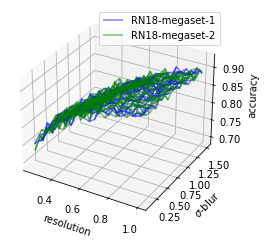

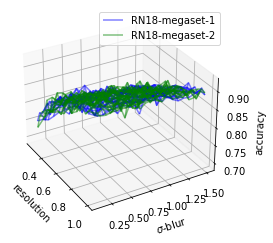

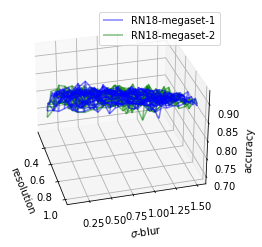

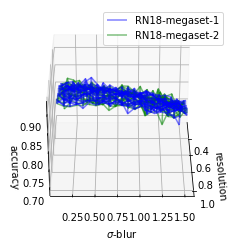

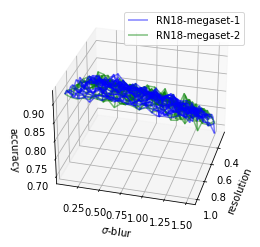

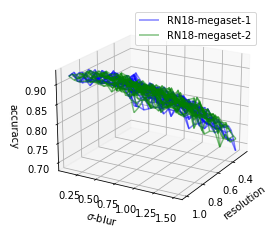

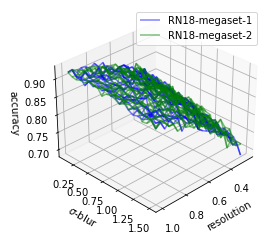

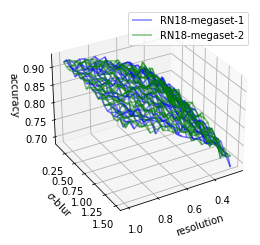

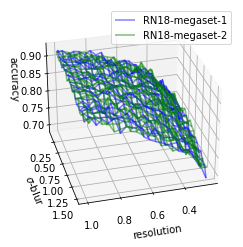

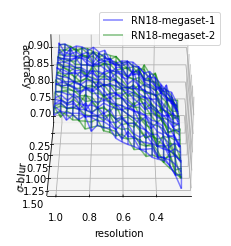

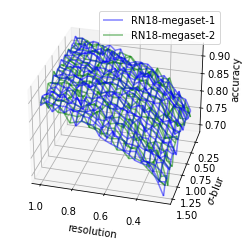

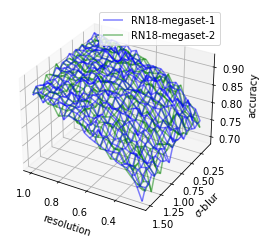

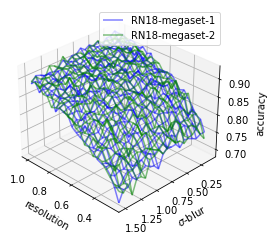

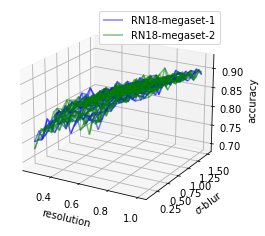

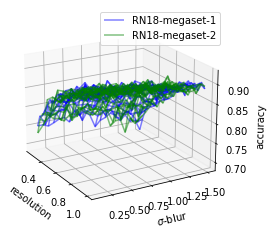

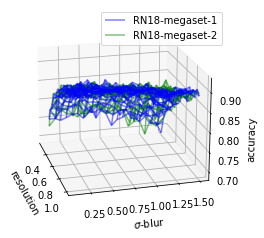

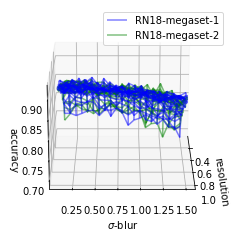

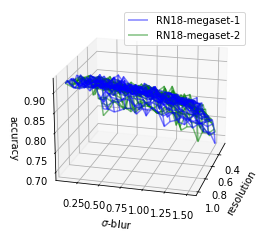

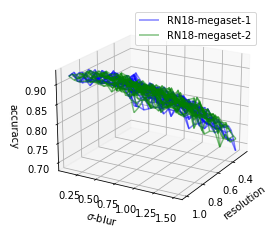

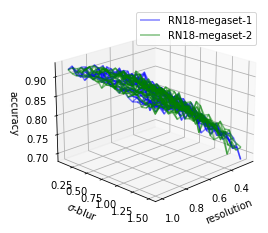

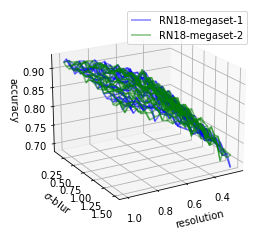

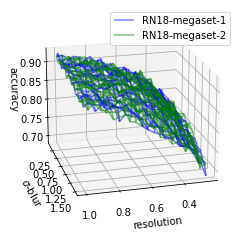

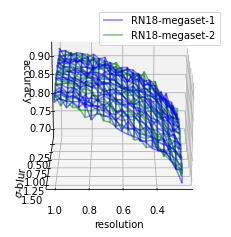

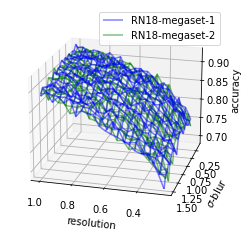

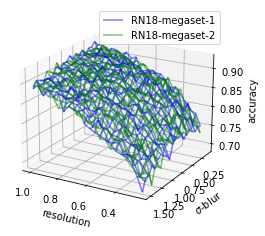

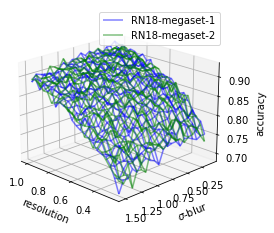

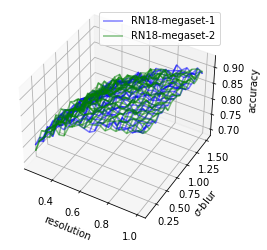

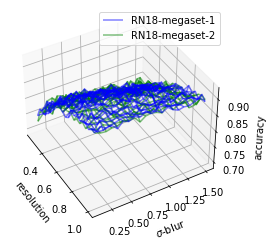

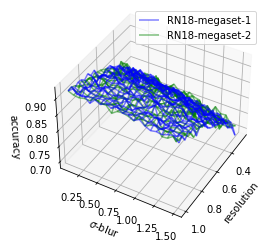

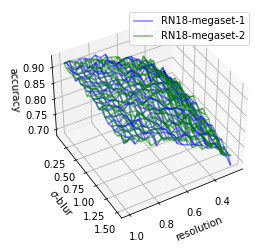

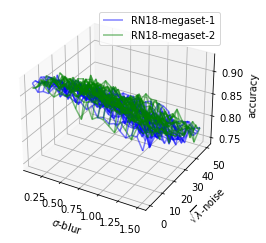

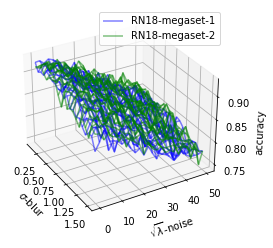

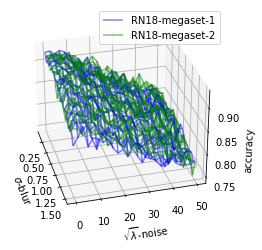

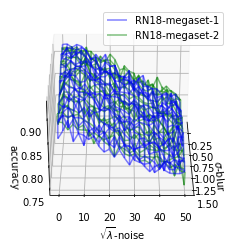

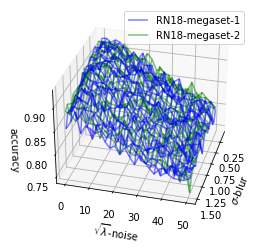

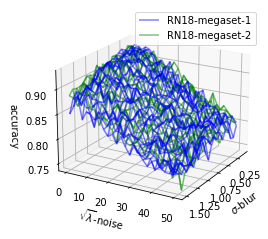

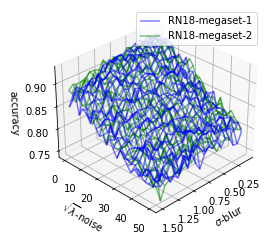

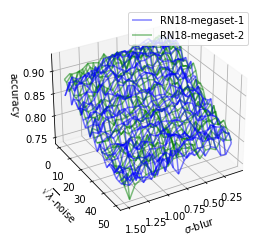

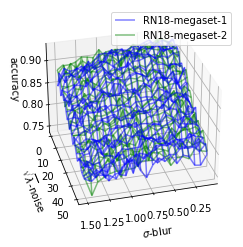

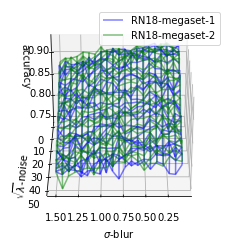

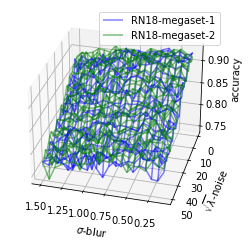

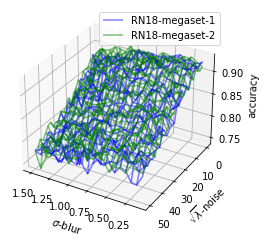

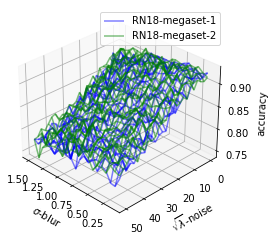

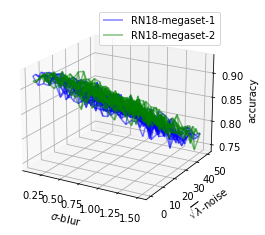

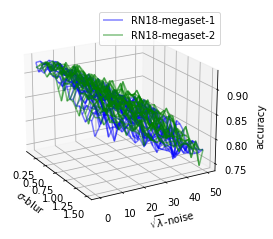

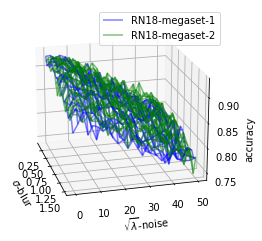

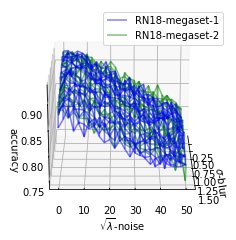

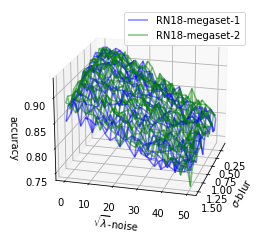

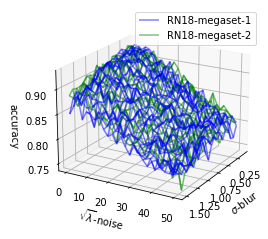

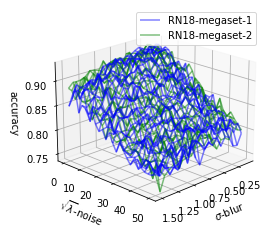

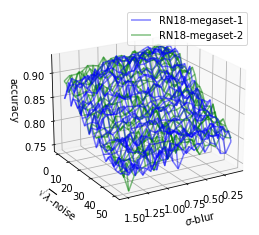

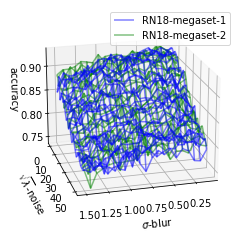

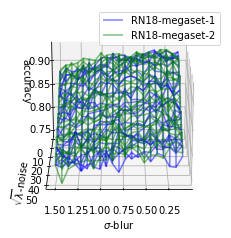

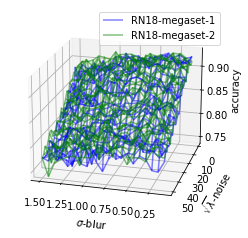

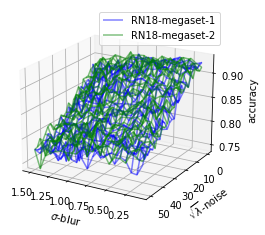

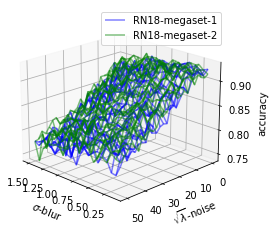

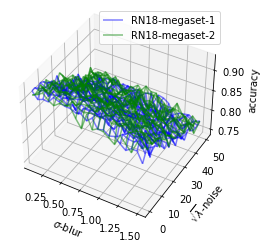

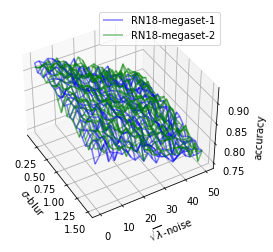

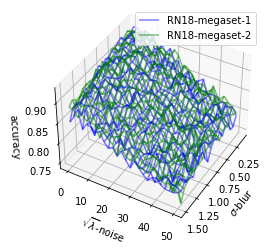

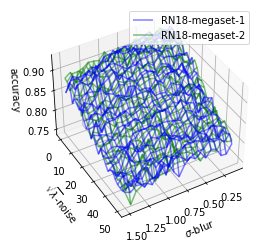

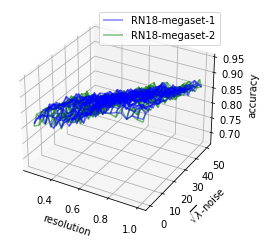

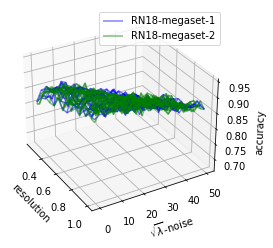

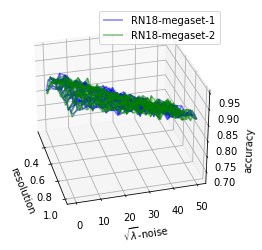

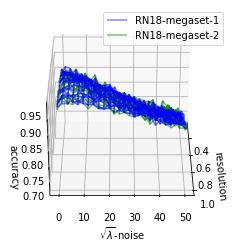

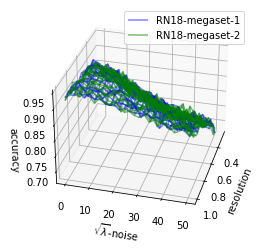

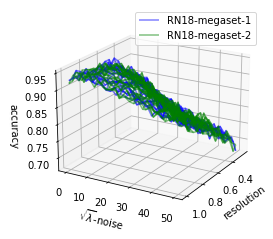

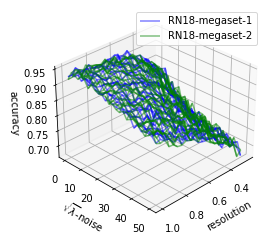

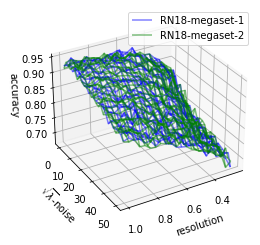

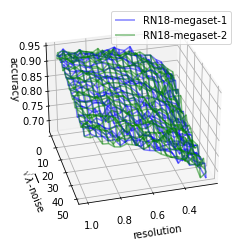

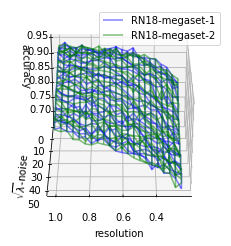

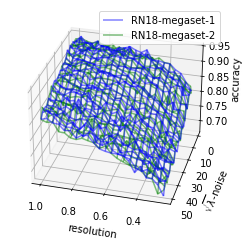

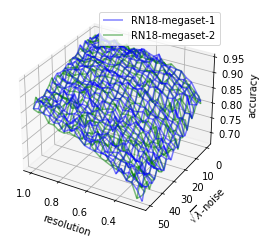

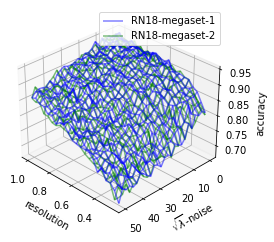

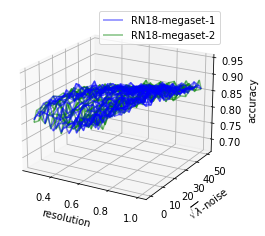

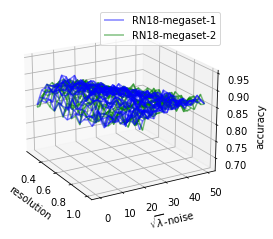

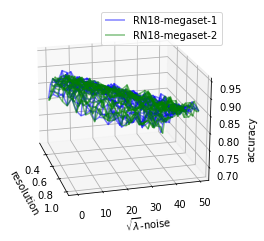

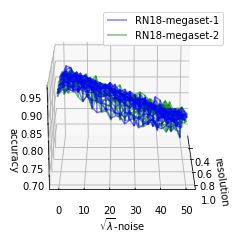

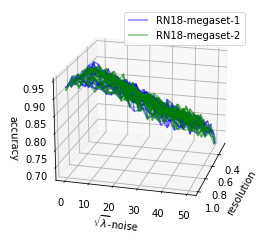

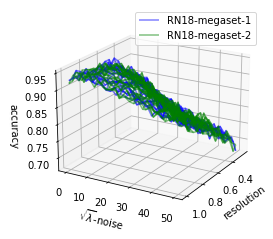

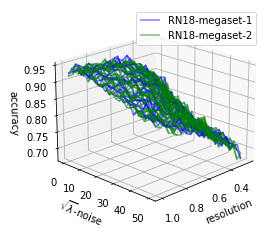

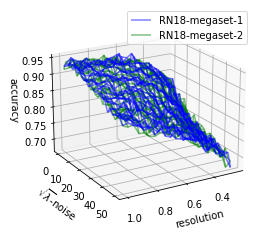

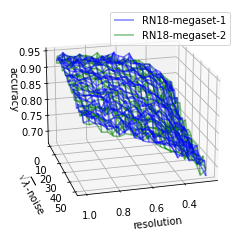

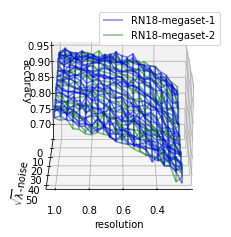

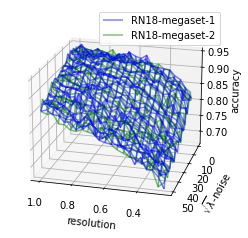

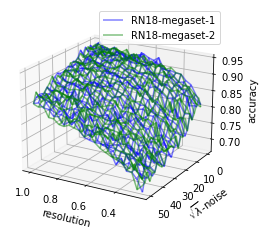

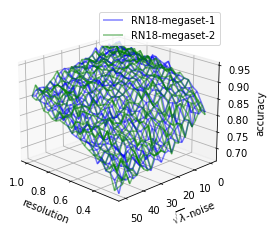

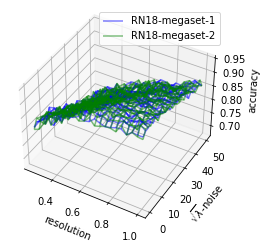

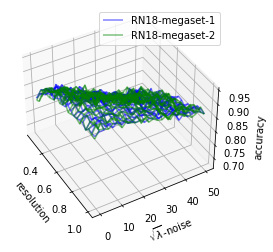

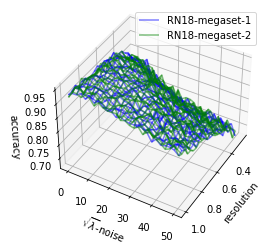

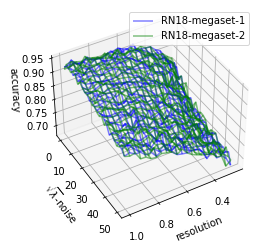

In [38]:
plot_results_together([rn18_megaset_1, rn18_megaset_2], directory=output_dir, make_subdir=True)

In [ ]:
# create some helper functions to plot results together with minimal pain
# def create_identifier(perf_results, dim_tag=None):
#     """
#     Creates identifier from a list of model performance results. Intended for use in plotting different
#     sets of results together (i.e. built to be called by plot_results_together())
#     """
#     if dim_tag:
#         identifier = dim_tag
#     else:
#         identifier = None
#
#     for perf_result in perf_results:
#         if not identifier:
#             identifier = str(perf_result)
#         else:
#             identifier = f'{identifier}_{str(perf_result)}'
#
#     return identifier

# def plot_results_together(model_results, directory=None, make_subdir=False, dim_tag='2d', legend_loc='best'):
#     """
#     Plots performance of multiple models together.
#     """
#     if dim_tag == '2d':
#         identifier = create_identifier(model_results)
#     else:
#         identifier = create_identifier(model_results, dim_tag=dim_tag)
#
#     if directory and make_subdir:
#         sub_dir = Path(directory, identifier)
#         if not sub_dir.is_dir():
#             Path.mkdir(sub_dir)
#
#         directory = sub_dir
#
#     if dim_tag == '2d':
#         dp.plot_perf_2d_multi_result(model_results, directory=directory, identifier=identifier)
#     else:
#         dp.plot_perf_1d_multi_result(model_results, directory=directory, identifier=identifier, legend_loc=legend_loc)


In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
# plot_results_together([rn50_pre_trained, rn50_full_range], directory=output_dir, make_subdir=True)

In [ ]:
# plot_results_together([default_lr, low_lr, low_lr_early_stop], directory=output_dir, make_subdir=True)
# plot_results_together([default_lr, low_lr_early_stop], directory=output_dir, make_subdir=True)

In [ ]:
# exp_dir = Path(output_dir, 'plot_experiment')
# Path.mkdir(exp_dir)
# dp.analyze_perf_2d(default_lr, directory=exp_dir)

In [ ]:
# plot_results_together([full_range, pre_trained, endpoint], directory=output_dir, make_subdir=True)

In [ ]:
# plot pre-trained and endpoint results together
# plot_results_together([pre_trained, endpoint], directory=output_dir, make_subdir=True)

In [ ]:
# plot midpoint and mid-band together
# plot_results_together([midpoint, mid_band], directory=output_dir, make_subdir=True)

In [ ]:
# # plot full range with everything else
# plot_results_together([full_range, pre_trained], directory=output_dir, make_subdir=True)
# plot_results_together([full_range, midpoint], directory=output_dir, make_subdir=True)
# plot_results_together([full_range, mid_band], directory=output_dir, make_subdir=True)
# plot_results_together([full_range, endpoint], directory=output_dir, make_subdir=True)

In [ ]:
# plot_results_together([full_range, mid_band, midpoint, endpoint, pre_trained], directory=output_dir, make_subdir=True)

In [ ]:
# plot_results_together([full_range, pre_trained], directory=output_dir, make_subdir=True, dim_tag='1d')